<a href="https://colab.research.google.com/github/Khamaldeeen/Stock-Market-Analysis-Apple-/blob/Analytics0.1/Stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pandas_datareader import DataReader

In [0]:
from datetime import datetime

In [5]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
comp_list = ['AAPL','GOOG', 'AMZN', 'MSFT' ]

In [0]:
end_date = datetime.today()

start = datetime(end_date.year-1, end_date.month, end_date.day)

In [0]:
for item in comp_list:
  globals()[item] = DataReader(item, 'yahoo', start, end_date)

In [11]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-15,199.850006,198.009995,198.580002,199.229996,17536600.0,196.655960
2019-04-16,201.369995,198.559998,199.460007,199.250000,25696400.0,196.675705
2019-04-17,203.380005,198.610001,199.539993,203.130005,28906800.0,200.505585
2019-04-18,204.149994,202.520004,203.119995,203.860001,24195800.0,201.226151
2019-04-22,204.940002,202.339996,202.830002,204.529999,19439500.0,201.887497
...,...,...,...,...,...,...
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993
2020-04-08,267.369995,261.230011,262.739990,266.070007,42223800.0,266.070007
2020-04-09,270.070007,264.700012,268.700012,267.989990,40529100.0,267.989990


In [12]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,243.490952,238.106508,240.458928,241.037023,3.297828e+07,239.934111
std,43.302501,42.022817,42.526421,42.898025,1.737181e+07,43.449353
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,205.877502,202.572498,204.037502,204.212498,2.163890e+07,201.946720
50%,232.840004,227.650002,230.514999,229.665001,2.731305e+07,229.049065
75%,272.845001,265.869987,268.625008,270.942490,3.659412e+07,270.300995
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [0]:
sns.set_style('whitegrid')

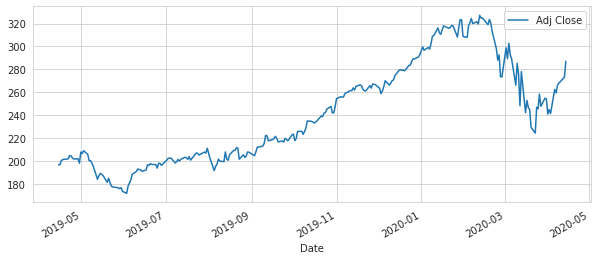

In [19]:
#Plotting the performance of the adj close as against the date is given below
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

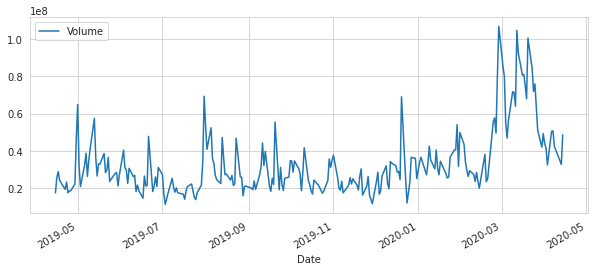

In [20]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [0]:
MA_day= [15, 30, 60]
for MA in MA_day:
  column_name = 'MA for %s days' %(str(MA))

  AAPL[column_name] = AAPL['Adj Close'].rolling(MA).mean()

In [23]:
AAPL['MA for 15 days']

Date
2019-04-15           NaN
2019-04-16           NaN
2019-04-17           NaN
2019-04-18           NaN
2019-04-22           NaN
                 ...    
2020-04-07    246.792667
2020-04-08    248.086001
2020-04-09    249.633333
2020-04-13    252.567333
2020-04-14    256.745999
Name: MA for 15 days, Length: 252, dtype: float64

In [24]:
new_ma_15 = AAPL['MA for 15 days']
new_ma_15.head()

Date
2019-04-15   NaN
2019-04-16   NaN
2019-04-17   NaN
2019-04-18   NaN
2019-04-22   NaN
Name: MA for 15 days, dtype: float64

In [0]:
new_ma_15.dropna(inplace=True)

In [26]:
new_ma_15

Date
2019-05-06    202.640964
2019-05-07    202.879838
2019-05-08    203.120027
2019-05-09    202.961435
2019-05-10    202.571823
                 ...    
2020-04-07    246.792667
2020-04-08    248.086001
2020-04-09    249.633333
2020-04-13    252.567333
2020-04-14    256.745999
Name: MA for 15 days, Length: 238, dtype: float64

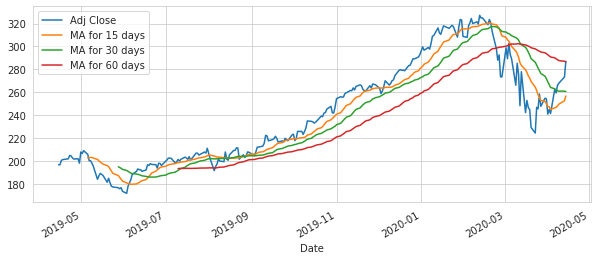

In [27]:
AAPL[['Adj Close','MA for 15 days', 'MA for 30 days', 'MA for 60 days']].plot(legend=True, figsize=(10,4))

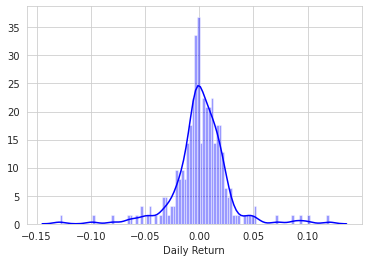

In [29]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100,color='Blue')

In [0]:
closing_df = DataReader(comp_list, 'yahoo', start = start,end= end_date)['Adj Close']

In [32]:
closing_df.head()

Symbols,AAPL,GOOG,AMZN,MSFT
Date,,,,
2019-04-15,196.655960,1221.099976,1844.869995,119.469353
2019-04-16,196.675705,1227.130005,1863.040039,119.193001
2019-04-17,200.505585,1236.339966,1864.819946,120.179947
2019-04-18,201.226151,1236.369995,1861.689941,121.759056
2019-04-22,201.887497,1248.839966,1887.310059,122.143959


In [33]:
closing_df.tail()

Symbols,AAPL,GOOG,AMZN,MSFT
Date,,,,
2020-04-07,259.429993,1186.510010,2011.599976,163.490005
2020-04-08,266.070007,1210.280029,2043.000000,165.130005
2020-04-09,267.989990,1211.449951,2042.760010,165.139999
2020-04-13,273.250000,1217.560059,2168.870117,165.509995
2020-04-14,287.049988,1269.229980,2283.320068,173.699997


In [0]:
return_stock = closing_df.pct_change()